<a href="https://colab.research.google.com/github/chandusayhi/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Every year, more than 140 million bookings made on the internet and many hotel bookings made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked in advance of 12 weeks.

This dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years.

Here I would like to show some booking information details with exploratory data analysis, some feature engineering, reviewing correlations between features and visualizing most important features and their interesting distribution properties. 

## **Dataset Information**

- **Hotel**
 * H1: Resort hotel 
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_number**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


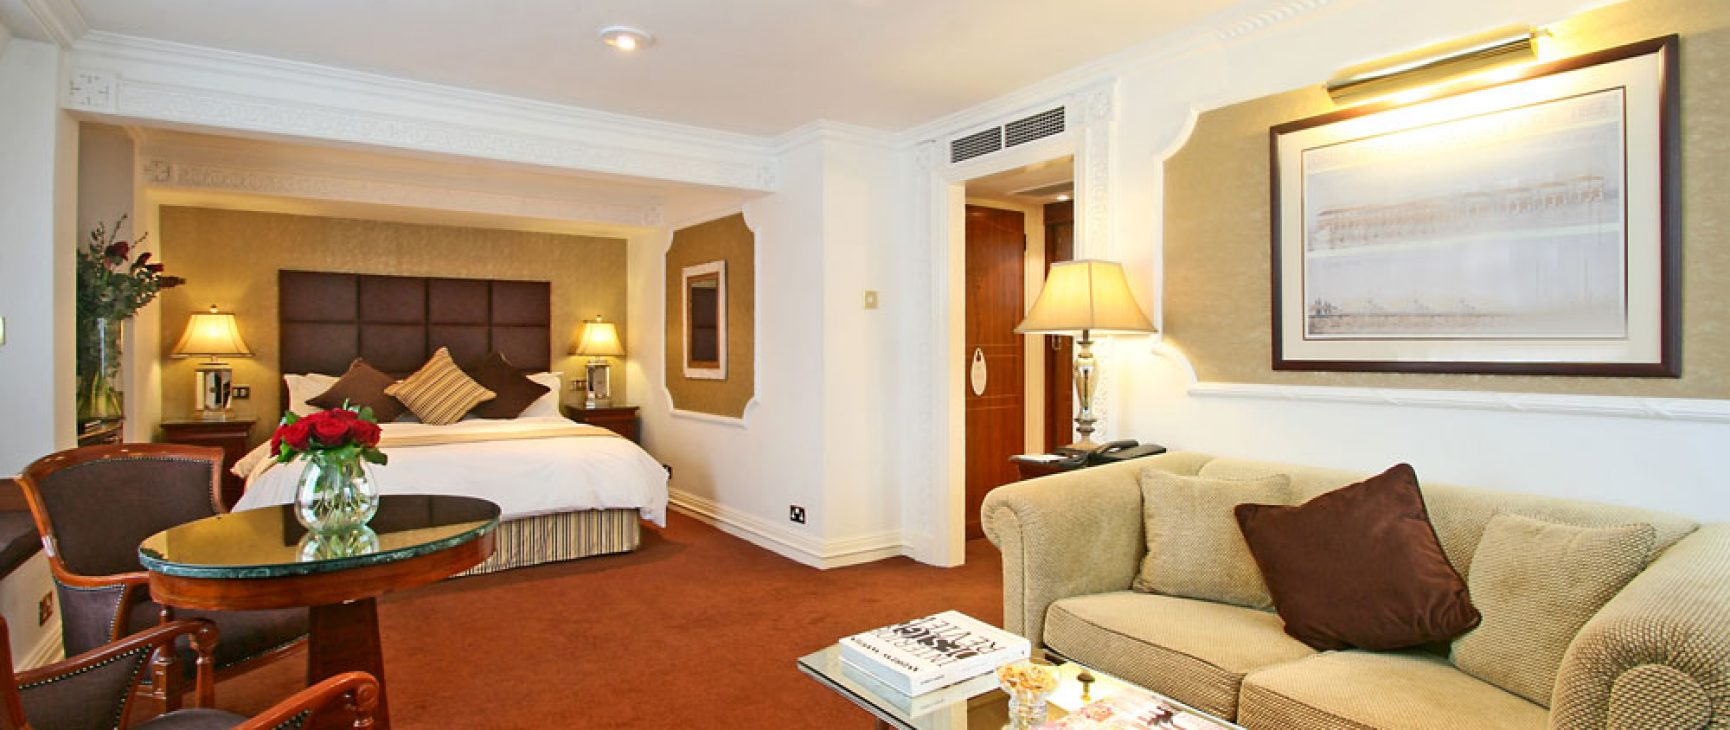

##Data Wrangling and Data Analysis

In [ ]:
# Mounting the drive to access the dataset present in the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries to be used in the project

#libraries to load the dataset and to perfrom analysis on the dataset
import numpy as np
import pandas as pd

#libraries for visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set_style("dark")

#libraries for easy to visualize data on an interactive leaflet map
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [ ]:
# Reading the dataset from the drive
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/EDA_Hotel_Booking_Analysis/Hotel Bookings.csv')

In [ ]:
# Print the number of rows and the columns in the data
print("#################################################### SHAPE OF DATA ##############################################################################")
rows = df.shape[0]
columns = df.shape[1]
print()
print("Number of rows in the data are {:,}".format(rows))
print("Number of columns in the data are {:,}".format(columns))
print()

#################################################### SHAPE OF DATA ##############################################################################

Number of rows in the data are 119,390
Number of columns in the data are 32



Hotel Booking Analysis dataset has a huge number of observations. We have a whopping 1 lakh 19 thousand 3 hundred ninteen observations that are spread across 32 different features.

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# checking the first ten observations of the dataset with head() method
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# checking the last five observations using tail() method.
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
  # Print the data info
print("#################################################### DATA INFROMATION ##############################################################################")
print()
print(df.info())

#################################################### DATA INFROMATION ##############################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int

##Observations :

The columns of the dataset are of heterogeneous datatypes. Columns are either object, integer or float type. Also we can see observe that a few columns have missing values. We need to deal with them as we proceed in the project. The float type columns are - children, company, agent and adr.

Out of these four columns :

children - contains information about number of children in the dataset.

company - contains information about company's ID responsible for making the booking or the payment maybe. in this index almost 94% of the values are missing so this data connot provide us any help in making any descision.

agent - might contain the information about the agent code who has done the booking, looking at the data we can guess that around 87% of bookings are made by some agents and rest 13.7%(null values) are either self made bookings or agent name not recorded.

adr - Index Name dosen't suggest anything so looking into the values and googling suggests - adr stands for "Average Daily Rate" which is defined by dividing the sum of all lodging transactions by the total number of staying nights.

From the above output, we can observe null values in 4 columns but according to the assumption we observed the dataset it can be noted that NULL here, does not mean missing value, rather it mean Not Applicable. While dealing with the null-values of these columns, we will also change their datatypes to integer for simplicity.

In [ ]:
# checking for any missing values count for features
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [ ]:
# checking for any missing values count along with percentage for features

perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T.sort_values(1,ascending=False)
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
company,112593.0,94.306893
agent,16340.0,13.686238
country,488.0,0.408744
children,4.0,0.003350
reserved_room_type,0.0,0.000000
assigned_room_type,0.0,0.000000
booking_changes,0.0,0.000000
deposit_type,0.0,0.000000
hotel,0.0,0.000000
previous_cancellations,0.0,0.000000


In [ ]:
# Describe the data
print("#################################################### DESCRIPTIVE STATISTICS ##############################################################################")
print()
print(df.describe())
print()

#################################################### DESCRIPTIVE STATISTICS ##############################################################################

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%        

In [ ]:
# checking the statistical summary ike percentile, mean and std of the numerical values of the Series or DataFrame 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


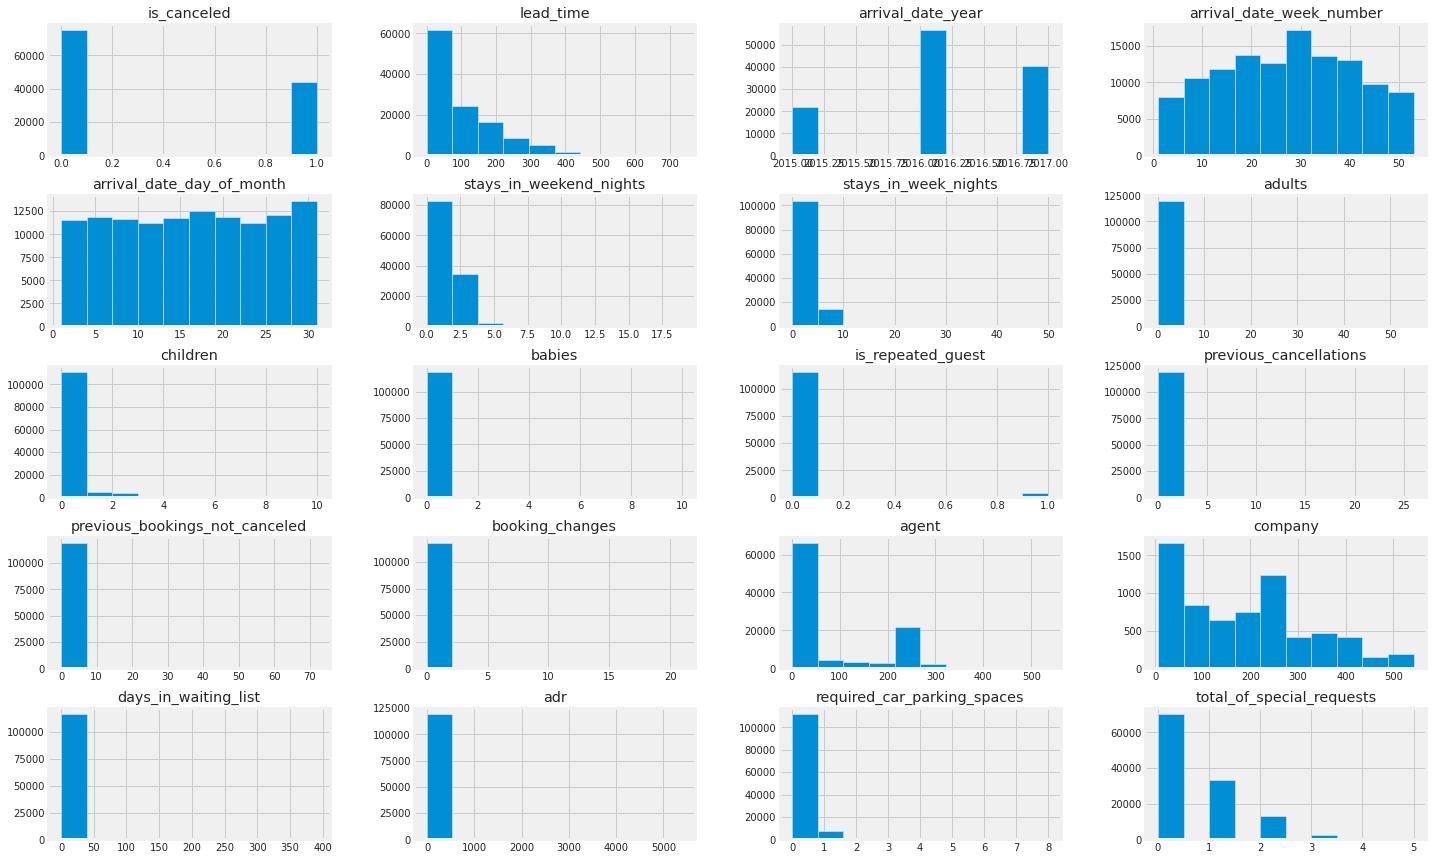

In [ ]:
#Histogram Representation of Numerical Features
df.hist(figsize=(22,15))
plt.show()

###Observation after looking at statistical summary:

1. The index adr have minimum value to be negative(-6.38%) which is not possible as average price cannot be negative.
2. The average cancelations are 37.04% and it deviates by 48.29% indicating lots of variations between cancelation.
3. Looking at the special request column, we found that around 75% of the customers asked for one special request.

In [ ]:
#removing the negative adr row
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


As there is only one record deviating tthe data, we can drop that perticular record.

In [ ]:
#dropping the single negative adr row
df.drop(df[df['adr']<0].index, inplace=True)

In [ ]:
#checking for the shape of the dataset now.
df.shape

(119389, 32)

Text(0.5, 1.0, 'Co-relation of the columns')

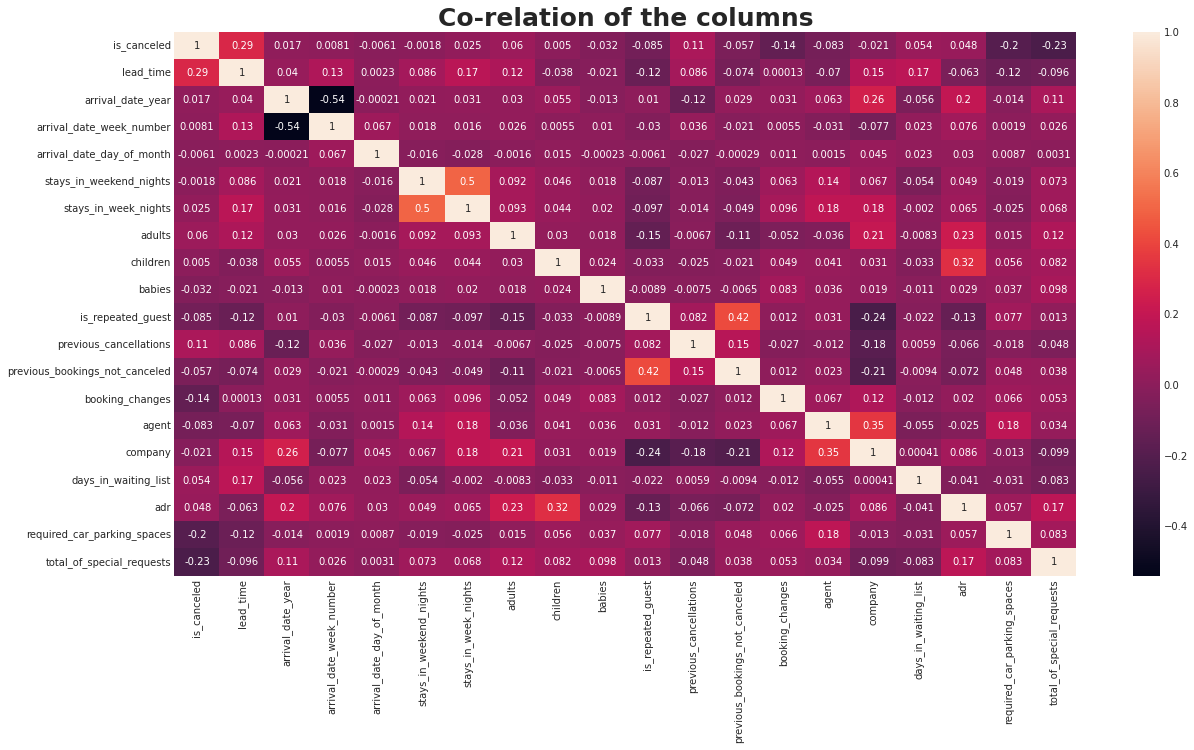

In [ ]:
#Heatmap of numeric variables
fig,axes = plt.subplots(1,1,figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns',fontweight='bold',fontsize=25)

<b>Perception</b>
1. Hightest Positive correlation of 0.42 can be observed between the columns 'is_repeated_guest' and 'previous_bookings_not_canceled'.
2. is_canceled column has highest co-relation with lead_time and total_of special_resquests.

##Null values treatment

In [ ]:
# Print the number of null values in the data and the percentage of null values
print("#################################################### FEATURES WITH NULL VALUES ##############################################################################")
print()
for col in df.columns:
  # Calculate the number of null values
  null_values = df[col].isnull().sum()
  # If the null values > 0 print the column, number of null values and the percentage of null values
  if null_values > 0:
    perc_null_vals = float(null_values)*100/rows
    print("FEATURE: {}".format(col))
    print("NULL VALUES COUNT: {}".format(null_values))
    print("PERCENTAGE VALUES COUNT: {:.3f}%".format(perc_null_vals))
    print()

#################################################### FEATURES WITH NULL VALUES ##############################################################################

FEATURE: children
NULL VALUES COUNT: 4
PERCENTAGE VALUES COUNT: 0.003%

FEATURE: country
NULL VALUES COUNT: 488
PERCENTAGE VALUES COUNT: 0.409%

FEATURE: agent
NULL VALUES COUNT: 16340
PERCENTAGE VALUES COUNT: 13.686%

FEATURE: company
NULL VALUES COUNT: 112592
PERCENTAGE VALUES COUNT: 94.306%



**Observation -**
- Now, Here we can see, **"Country"** feature has ***'488 Missing Values'***.
- Then, **"Agent" & "Company"** Features has ***Huge Number of Missing Values*** over here.
- So, As we can Observe over here, In this **"Agent"**, If **"Agent"** is ***Not Given***, it means, ***Most of the Bookings*** was made by a **Person** or We can say, ***Booking*** was mostly made without **"Agent"**.
- And Similarly, In terms of **"Comapany"**, if **'None'** is given, it means they are **'Private'**.

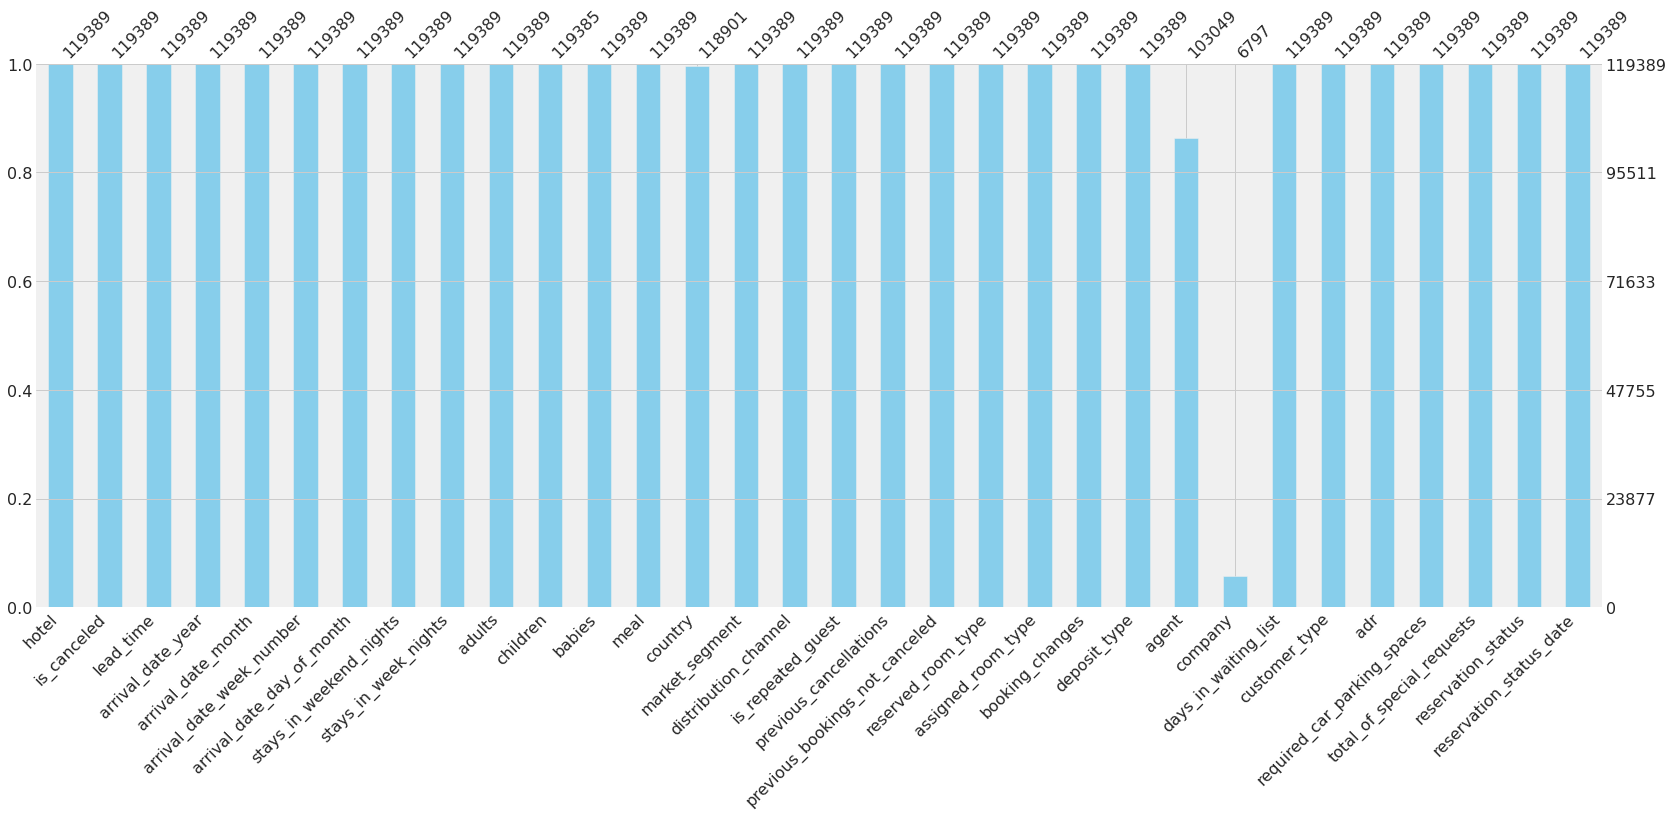

In [ ]:
#easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness of your dataset
msno.bar(df, color='skyblue')
plt.show()

<b>Now, Let's preprocess this data - Handling missing values:</b>

0.003% of rows have missing information for children. Let's look at distribution of children to fill missing information

In [ ]:
# children column is a numeric column 
# we will replace the null values with the null value as replacing with mean might end up giving us a floating value and count of children cannot be in decimals.


df['children'].value_counts()

0.0     110795
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Most bookings had no children and hence we will fill the missing rows for children with value 0

In [ ]:
#filling NA values with 0 
df['children'].fillna(0,inplace=True)

In [ ]:
#checking for missing values
df['children'].isnull().sum()

0

In [ ]:
#checking for count of missing values of childern attribute
df['children'].value_counts()

0.0     110799
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

0.4% of rows have missing information for country. Let's look at distribution of country to fill missing information

In [ ]:
# Country column - which is a categorical column having country names.
# We have a few missing values in this column too.
# Replacing the missing vaLUES with highest occuring values.
perc_country_data = pd.DataFrame([df['country'].value_counts(),df['country'].value_counts()*100/df.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48590.0,40.698892
GBR,12128.0,10.158390
FRA,10415.0,8.723584
ESP,8568.0,7.176541
DEU,7287.0,6.103577
...,...,...
MDG,1.0,0.000838
NCL,1.0,0.000838
SLE,1.0,0.000838
FJI,1.0,0.000838


40.7% of bookings are from Portugal. Only 0.4% is missing information. We will fill the missing rows of country as Portugal since the distribution will not change by much and we still get to preserve data and discard the row.

In [ ]:
#filling NA values with most occuring values  
df['country'].fillna('PRT',inplace=True)

In [ ]:
#checking for missing values
df['country'].isnull().sum()

0

13% of agent ID and 94% of company ID is missing. It is possible to dive deep into the details of the dataset to find a correlation of missing information in agent ID and company ID vs other other features like market segment, distribution channel etc; For example most direct bookings may not have an agent ID or company ID and the information is probably null. It is therefore possible to fill these missing values based on other features however for simplicity, we will drop both the columns

In [ ]:
#Dropping the agent and company columns 
df.drop(['agent','company'],axis=1,inplace=True)

Let's confirm all missing data have been handled

In [ ]:
# checking for any missing values count along with percentage for features

perc_missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


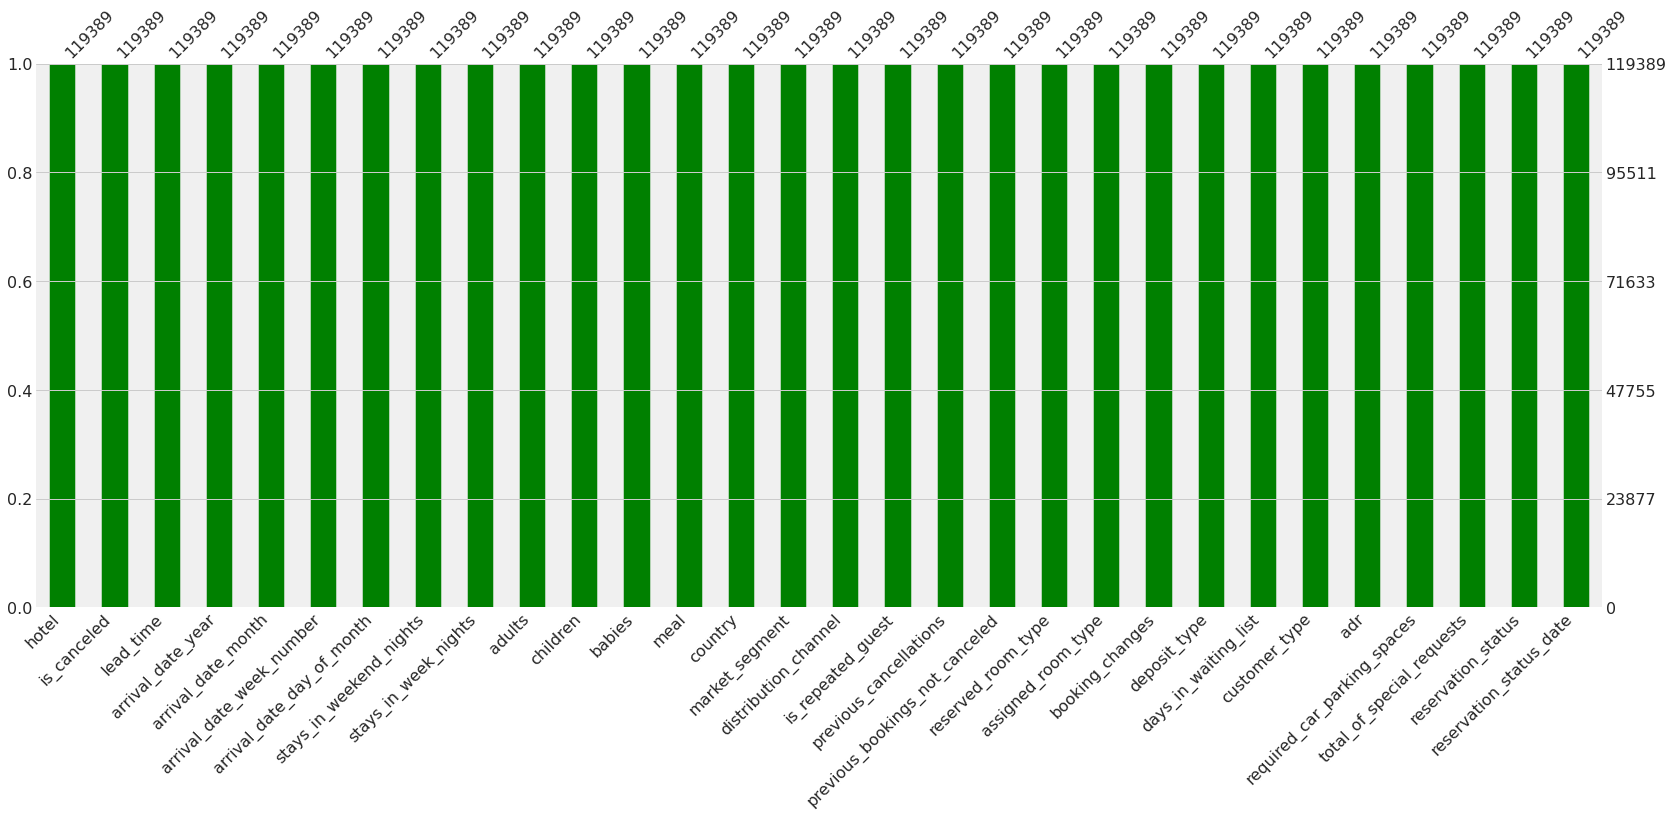

In [ ]:
#easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness of your dataset
msno.bar(df, color='green')
plt.show()

<b>Data has no more null values.</b>

Now go for analysing Outliers in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

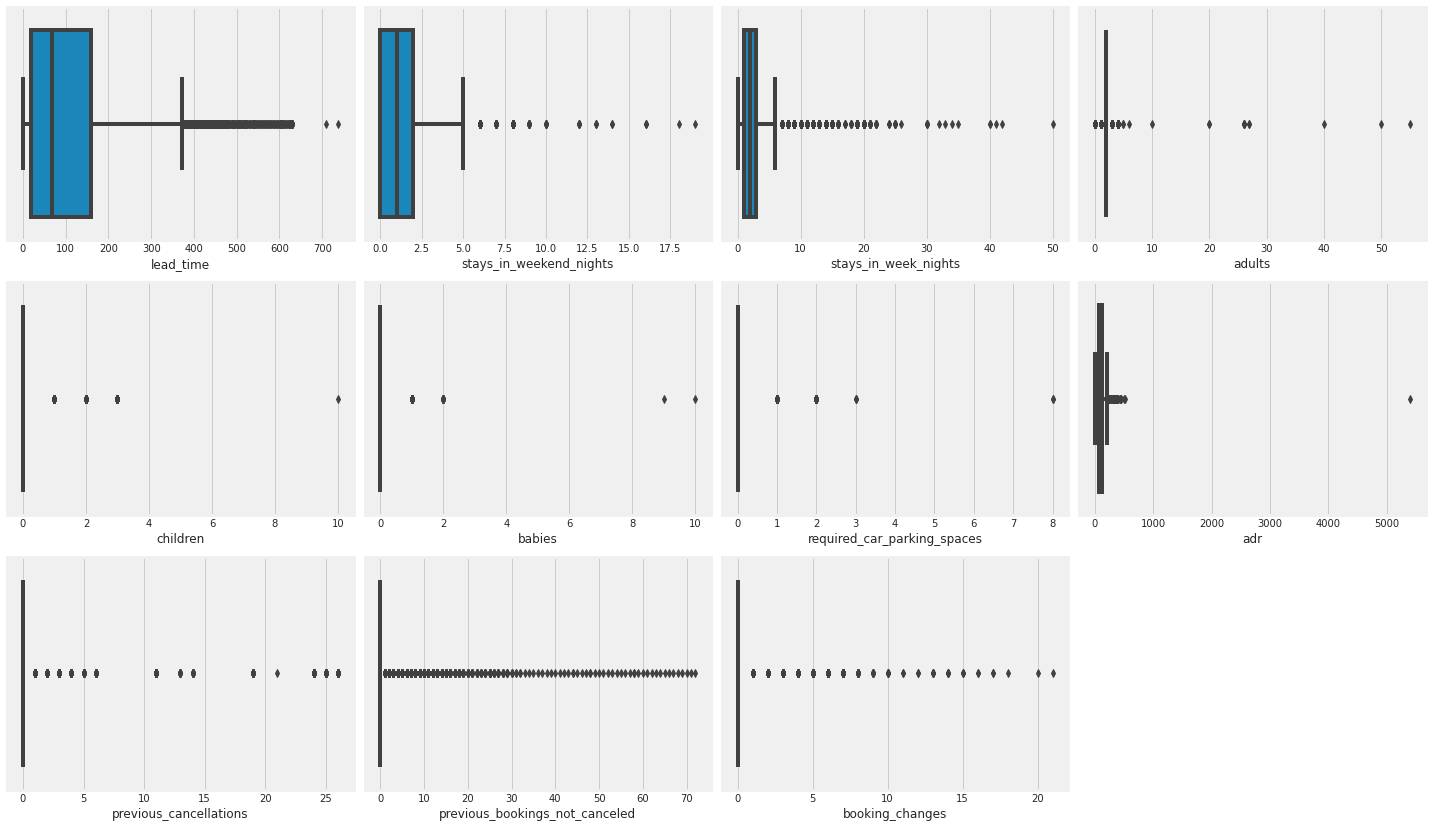

In [ ]:
#finding the outliers with the boxplot
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [ ]:
#outliers removal with assigning the values
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr > 1000, 'adr'] = 1000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

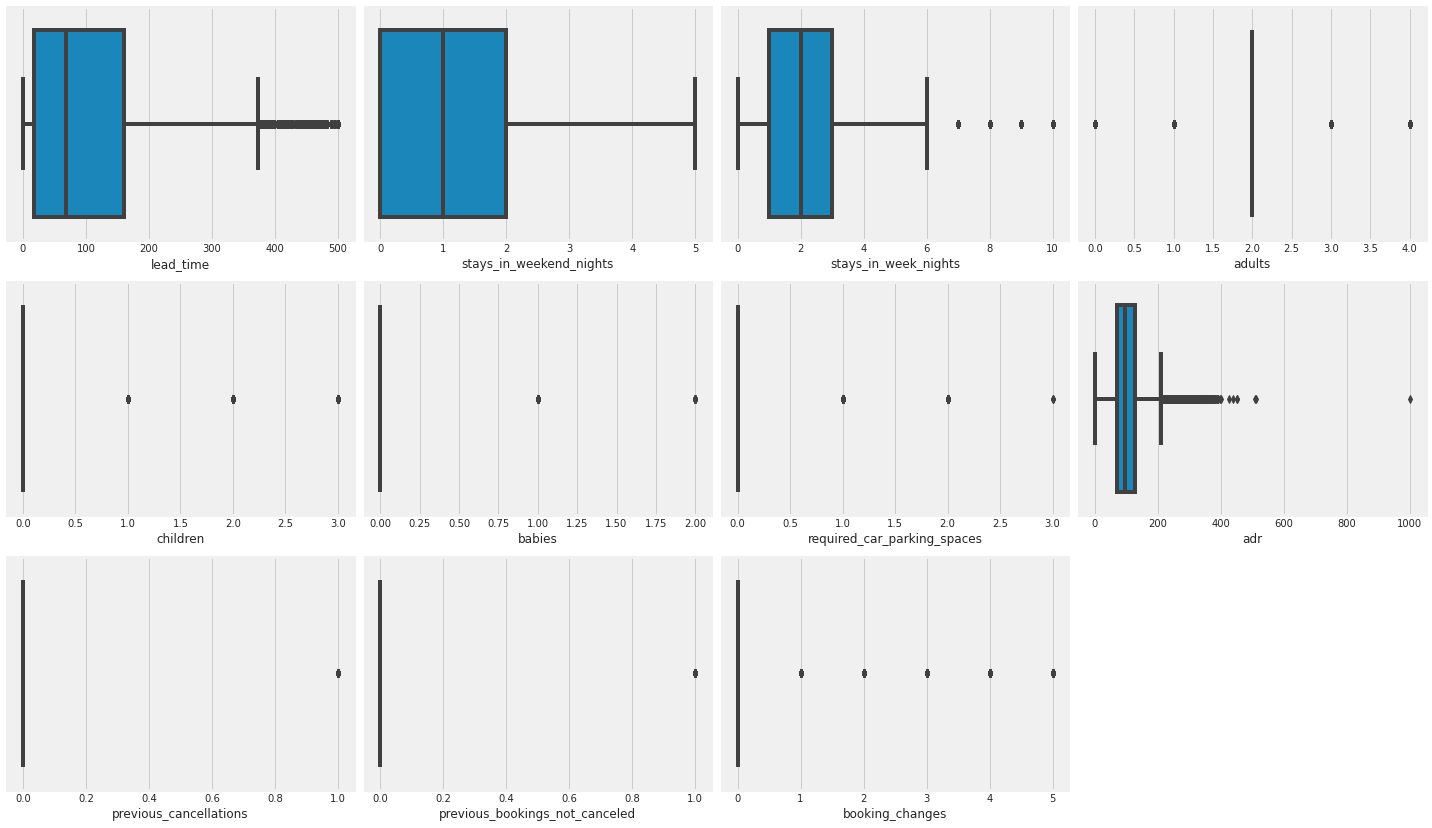

In [ ]:
#checking the outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

As per the dataset observed there are 2 types of hotel:

1. City Hotel
2. Resort Hotel

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40059
Name: hotel, dtype: int64

In [ ]:
#To find out the number of bookings in different types of hotel.
booking_by_hotel_type=df["hotel"].value_counts().reset_index().rename(columns={'index':'Hotel','hotel':'Count'})
booking_by_hotel_type

,Hotel,Count
0,City Hotel,79330
1,Resort Hotel,40059


Text(0.5, 0, 'Number of bookings')

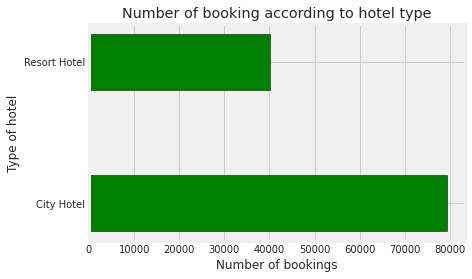

In [ ]:
# plotting a bar chart to compare number of bookings made in each type of hotel
plt.barh(booking_by_hotel_type['Hotel'],booking_by_hotel_type['Count'],color='green',height=0.4,edgecolor='black')
plt.title('Number of booking according to hotel type')
plt.ylabel('Type of hotel')
plt.xlabel('Number of bookings')

### **Perception**

City hotel are more in records than resort hotels this might be due to the one or more of the following reasons:

<li>City hotels might be cheaper than resort hotels.
<li>City Hotels are more than the resort hotels.
<li>Customers preference for city hotels over resort hotels.

People prefer City Hotel than a Resort Hotel by far(almost double).

###<b>Where do the guests come from and perform spatial Analysis<b>

Visualise the number of customers by country

In [ ]:
# Plotting a pie-chart to visualise the number of records by country

'''
This analysis involves 3 parts:
1. Visualising the number of bookings by country.
2. Visualising the number of confirmed(non-cancelled) bookings by country.
3. Visualising the number of cancelled bookings by country.
'''


# Extract the total country data
total_country_data =  df['country'].value_counts().to_frame().reset_index()
total_country_data.rename(columns = {'index' : 'country', 'country' : 'guest_count'}, inplace=True)

# Extract the total country data with confirmed bookings
total_country_data_confirmed =  df[df['is_canceled'] == 0]['country'].value_counts().to_frame().reset_index()
total_country_data_confirmed.rename(columns = {'index' : 'country', 'country' : 'guest_count_confirmed'}, inplace=True)

# Extract the total country data with canceled bookings
total_country_data_canceled =  df[df['is_canceled'] == 1]['country'].value_counts().to_frame().reset_index()
total_country_data_canceled.rename(columns = {'index' : 'country', 'country' : 'guest_count_canceled'}, inplace=True)


#################################################################### PLOT THE PIE CHARTS ##########################################################################################

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

# 1 Visualising the number of bookings by country
fig.add_trace(go.Pie(labels = total_country_data['country'].values.tolist(), 
                     values=total_country_data['guest_count'].values.tolist(), 
                     title = 'Total Bookings Across Countries'), 1, 1)

# 2. Visualising the number of confirmed(non-cancelled) bookings by country
fig.add_trace(go.Pie(labels = total_country_data_confirmed['country'].values.tolist(), 
                     values=total_country_data_confirmed['guest_count_confirmed'].values.tolist(), 
                     title = 'Total Confirmed Bookings Across Countries'), 1, 2)

# 3. Visualising the number of cancelled bookings by country
fig.add_trace(go.Pie(labels = total_country_data_canceled['country'].values.tolist(), 
                    values=total_country_data_canceled['guest_count_canceled'].values.tolist(), 
                    title = 'Total Canceled Bookings Across Countries'), 1, 3)
# Update the traces
fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))

In [ ]:
#Now, Let's perform a "Spatial Analysis" - Create a filter -   
spatial_analysis = df[df['is_canceled']==0]
spatial_analysis['country'].value_counts()

PRT    21492
GBR     9675
FRA     8481
ESP     6391
DEU     6069
       ...  
BDI        1
ASM        1
MAC        1
CYM        1
MRT        1
Name: country, Length: 165, dtype: int64

In [ ]:
#Now, Let's make it as a dataframe -
country_wise_data = spatial_analysis['country'].value_counts().reset_index()
country_wise_data

,index,country
0,PRT,21492
1,GBR,9675
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BDI,1
161,ASM,1
162,MAC,1
163,CYM,1


In [ ]:
#Now, Let's do some pre-processing -
country_wise_data.columns = ['Country', 'Number of Guests']
country_wise_data.head()

,Country,Number of Guests
0,PRT,21492
1,GBR,9675
2,FRA,8481
3,ESP,6391
4,DEU,6069


In [ ]:
#Now, Let's plot our "choropleth Map" over here.

px.choropleth(data_frame = country_wise_data, locations=country_wise_data['Country'], 
              color = country_wise_data['Number of Guests'], hover_name = country_wise_data['Country'], 
             title = 'Home Country of Guests')

**Perception -**   
- From this Chloropleth Map, We can say that, **"PRT" (Portugal)**  has the ***Highest/Maximum Number of Guest*** of around **'21.071K'** followed by **"GBR" (United Kingdom) I.e. UK** and **"FRA" (France)** having **'9.67K'** and **'8.48K' Number of Guests** respectively.
- ***'People' from All over the World*** are ***staying*** in basically our **"Resort"** and **"Cities Hotel"**.
- But ***Most of the Guests*** are basically from **"Portugal"** and **Other Countries in "Europe"**, because will observe from **"US"**, **"Brazil"** we don't have that ***Much Number of Guests***. Then, From **"India"** as well, we don't have that ***Much Number of Guests*** whereas In case of **"European Countries"**, We have a ***Higher Number of Guests***.

In [ ]:
#Let's analyse it in-depth by split this data year-wise
df_hotel_bookings_NW = df[(df['is_canceled']==0) & (df['country']!=0)]
df_hotel_bookings_NW

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_hotel_bookings_NW = df_hotel_bookings_NW.groupby(['arrival_date_year','country'])['hotel'].agg('count').reset_index()
df_hotel_bookings_NW

,arrival_date_year,country,hotel
0,2015,AGO,46
1,2015,ALB,2
2,2015,ARG,14
3,2015,ARM,1
4,2015,AUS,27
...,...,...,...
363,2017,UZB,2
364,2017,VEN,3
365,2017,VNM,3
366,2017,ZAF,26


In [ ]:
df_hotel_bookings_NW.sort_values(by=['arrival_date_year','country'], ascending=True, inplace=True)
df_hotel_bookings_NW.columns = ['Year', 'Country', 'Number of Guests']
df_hotel_bookings_NW

,Year,Country,Number of Guests
0,2015,AGO,46
1,2015,ALB,2
2,2015,ARG,14
3,2015,ARM,1
4,2015,AUS,27
...,...,...,...
363,2017,UZB,2
364,2017,VEN,3
365,2017,VNM,3
366,2017,ZAF,26


In [ ]:
#Now, Let's visualize this data -
px.choropleth(data_frame= df_hotel_bookings_NW,               
              locations = df_hotel_bookings_NW['Country'],               
              color = df_hotel_bookings_NW['Number of Guests'],
              hover_name = df_hotel_bookings_NW['Country'],  
              animation_frame = df_hotel_bookings_NW['Year'],    
              color_continuous_scale = 'Plasma',
              height = 600, 
              title = 'Proportion of Guests Country-wise')

**Perception -**   
- From this Chloropleth Map, We can say that, there is a ***significant rise*** of ***Number of Guests*** in terms of **"PRT", "GBR",** and **"FRA"** from the ***Year 2015 to 2016***. However, again in the ***Year 2016 to 2017***, the ***Number of Guests*** proportion has ***declined rapidly***.

###<b>Which type of hotel has the highest number of cancellations?</b>

In [ ]:
#To find number of cancelled bookings.
cancellation=df['is_canceled'].value_counts().reset_index().rename(columns={'index':'cancellation status','is_canceled':'number'})
cancellation

,cancellation status,number
0,0,75165
1,1,44224


In [ ]:
#To find percentage of bookings which are cancelled.
percentage_cancellation=round(cancellation.loc[1]['number']/(cancellation.loc[0]['number']+cancellation.loc[1]['number']),4)*100
percentage_cancellation

37.04

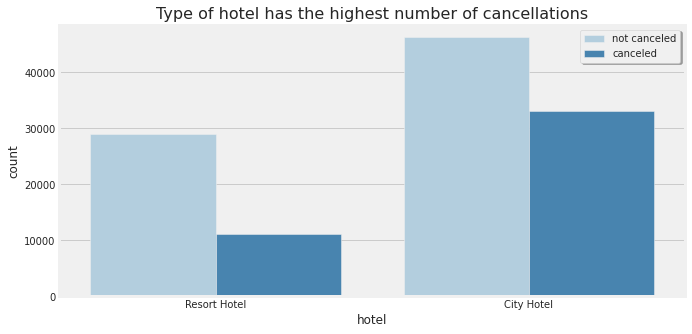

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'hotel',hue='is_canceled',palette='Blues')
plt.title("Type of hotel has the highest number of cancellations",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

In [ ]:
#Cancellations done for each month of the year
c2015 = df[(df["arrival_date_year"] == 2015) & (df["is_canceled"] == 1)]
c2016 = df[(df["arrival_date_year"] == 2016) & (df["is_canceled"] == 1)]
c2017 = df[(df["arrival_date_year"] == 2017) & (df["is_canceled"] == 1)]

c2015 = pd.DataFrame(c2015["arrival_date_month"].value_counts(sort=False))
c2016 = pd.DataFrame(c2016["arrival_date_month"].value_counts(sort=False))
c2017 = pd.DataFrame(c2017["arrival_date_month"].value_counts(sort=False))

c2015.rename(columns={"arrival_date_month":"Cancellations"}, inplace=True)
c2016.rename(columns={"arrival_date_month":"Cancellations"}, inplace=True)
c2017.rename(columns={"arrival_date_month":"Cancellations"}, inplace=True)


c2015["Month"]=c2015.index
c2016["Month"]=c2016.index
c2017["Month"]=c2017.index

fig = make_subplots(rows=3, cols=1)
fig.add_trace(go.Bar(x= c2015.Month, y=c2015.Cancellations, name="2015"), 1,1)
fig.add_trace(go.Bar(x= c2016.Month, y= c2016.Cancellations, name="2016"), 2,1)
fig.add_trace(go.Bar(x= c2017.Month, y= c2017.Cancellations, name="2017"), 3,1)
fig.update_layout(title="Cancellations per Month",height=800)
fig.show()

print(f"""Mean cancellations per month (where we have the data) were:
In 2015: {round(c2015[c2015["Cancellations"]!=0]["Cancellations"].mean(),2)}
In 2016: {round(c2016[c2016["Cancellations"]!=0]["Cancellations"].mean(),2)}
In 2017: {round(c2017[c2017["Cancellations"]!=0]["Cancellations"].mean(),2)}""")

Mean cancellations per month (where we have the data) were:
In 2015: 1357.0
In 2016: 1694.75
In 2017: 1968.12


##<b>How much do guests pay for a room per night?</b>

In [ ]:
#Let's have a preview of our DataFrame -
pd.set_option("display.max_columns", None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Now, Let's filter our DataFrame to get 'Valid Bookings' only -

data = df[df['is_canceled']==0]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


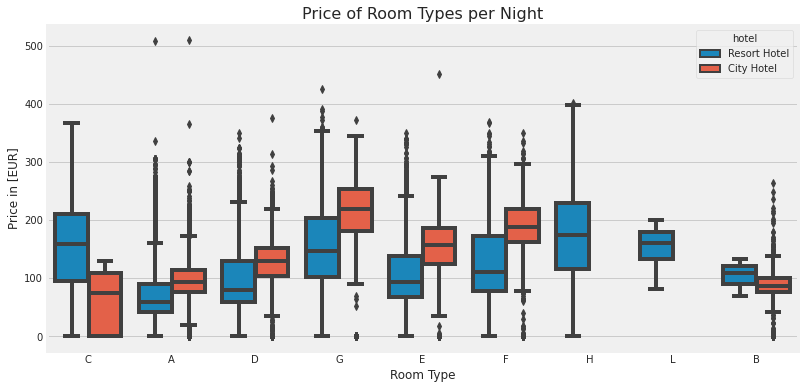

In [ ]:
#How much do Guests Pay for a Room per Night?
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'reserved_room_type', y = 'adr', hue = 'hotel', data = data)
plt.title('Price of Room Types per Night', fontsize = 16)
plt.xlabel('Room Type')
plt.ylabel('Price in [EUR]')
plt.show()

**Perception -**
- From this, will see over here, **"A" Category Room**, are having ***Highest Price*** approx. **'500 EUR'**.
- Whereas with respect to this **"G" Category Room** as well, will see that ***'City Hotel Rooms'*** are ***Much 'Costlier'*** than All other ***Rooms***.

##<b>How does the Price per Night vary over the Year?</b>

In [ ]:
#Let's Create a 'Filter' -
resort_df = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]

city_df = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]

In [ ]:
#Now, Checking our 'resort Hotel' DataFrame -
resort_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#Now, Checking our 'City Hotel' DataFrame -
city_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


In [ ]:
#Let's create a 'filter' w.r.t. our 'Resort Hotel' -
data_resort = resort_df[resort_df['is_canceled']==0]
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [ ]:
#Now, Let's create a 'filter' w.r.t. our "City Hotel" -
data_city = city_df[city_df['is_canceled']==0]
data_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data_resort.groupby('arrival_date_month')['adr'].mean()

arrival_date_month
April         75.867816
August       181.205892
December      68.322236
February      54.147478
January       48.708919
July         150.122528
June         107.921869
March         57.037135
May           76.657558
November      48.681640
October       61.727505
September     96.416860
Name: adr, dtype: float64

In [ ]:
#Now, Let's make it as dataframe -
resort_hotel = data_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.037135
8,May,76.657558
9,November,48.681640


In [ ]:
#Now, Let's perform this similar operations for our "City Hotel" as well.
city_hotel = data_city.groupby('arrival_date_month')['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [ ]:
#Let's "Merge()" both these dataframes -
final = resort_hotel.merge(city_hotel, on = 'arrival_date_month', how = 'left')
final

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.037135,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
#Now, Let's do some pre-processing -
final.columns = ['Month', 'Price_for_Resort', 'Price_for_City']
final.head()

,Month,Price_for_Resort,Price_for_City
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634


In [ ]:
#Now, Let's import the "sort_dataframeby_monthorweek" Module -
import sort_dataframeby_monthorweek as sd

In [ ]:
#Now, Let's sort our Months -
final_sorted = sd.Sort_Dataframeby_Month(df = final, monthcolumnname = 'Month')
final_sorted

,Month,Price_for_Resort,Price_for_City
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.037135,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [ ]:
#Let's visualize this data -
px.line(data_frame = final_sorted, x = 'Month', y = ['Price_for_Resort', 'Price_for_City'], 
        labels = {'value':'Price', 'variable':'Type of Hotel'}, 
        title = 'Room Price per Night over a Year')

**Perception -**
- Now, From this ***Visual***, We can ***Clearly see*** that, **"Resort Hotel Prices"** are much ***Higher*** during the **'Summer'**, whereas at the same time, **"Prices"** of a **"City Hotel"** doesn't ***varied*** that much.
- On the other hand, **"City Hotels"** are ***Expensive / Most Expensive*** during the **'Spring'** or **'Autumn'** Season (i.e. In **'May'** and **'August'**).

###<b> Distributions of nights spent at hotels by market segment and hotel type?

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#Distribution of Nights Spent at Hotels by Market Segment and Hotel Type.
#Now, Let's do the some computation for 'Total Nights Stay' -
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_nights, Length: 119389, dtype: int64

In [ ]:
#Now, Let's get a preview of our DataFrame -
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
analysis=df[['hotel', 'market_segment' ,'total_nights']]
analysis.head()

,hotel,market_segment,total_nights
0,Resort Hotel,Direct,0
1,Resort Hotel,Direct,0
2,Resort Hotel,Direct,1
3,Resort Hotel,Corporate,1
4,Resort Hotel,Online TA,2


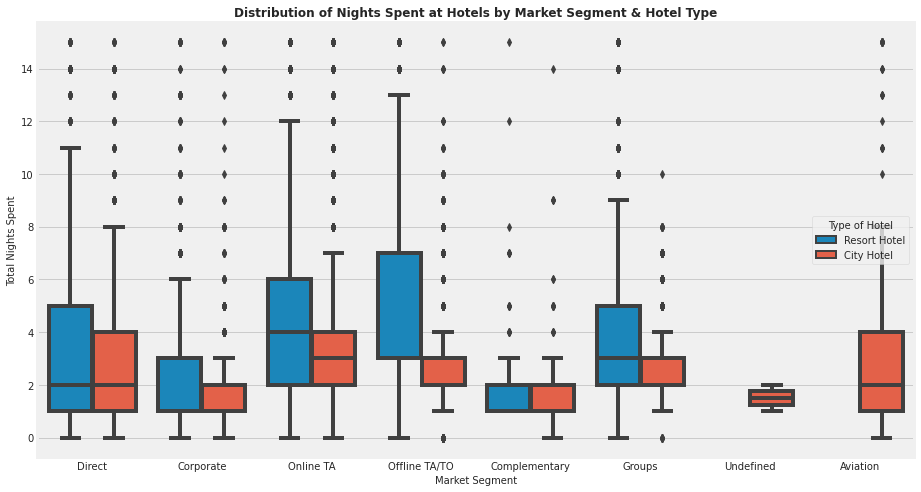

In [ ]:
#Now, Let's plot this data -
plt.figure(figsize=(14, 8))
sns.boxplot(x = 'market_segment', y = 'total_nights', hue = 'hotel', data = analysis)
plt.title('Distribution of Nights Spent at Hotels by Market Segment & Hotel Type', fontsize = 12, fontweight = 'bold')
plt.xlabel('Market Segment', fontsize = 10)
plt.ylabel('Total Nights Spent', fontsize = 10)
plt.legend(title = 'Type of Hotel')
plt.show()

**Perception -**
- To **conclude** this plot, We can say, ***Most People*** do ***not seem to prefer*** to **'Stay'** at the ***'Hotel' More than "1 Month"***.   
- And In case of **"Resort Hotel"**, Most of the times, guests were ***Stayed More***. 
- It means, It is obvious that ***Whenever People Go*** to **"Resort Hotels"**, they **prefer** to ***Stay More*** rather than **"City Hotels"**.

###<b>Analysing Preference of Guests in terms of 'Meal', What they basically Prefer?</b>

In [ ]:
#Analysing Preference of Guests in terms of 'Meal', What they basically Prefer?

df['meal'].value_counts()

BB           92309
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
#Now, Let's visualize this data -
fig = px.pie(data_frame = df, 
             names = df['meal'].value_counts().index, 
             values = df['meal'].value_counts(), 
             hole = 0.45, 
             title = "Preference of Guests in terms of Meal's")

fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

**Perception -**
- From this **"Donut Chart"**, ***Almost "77.3%" of the Bookings*** are definitely ***reserved / prefer*** ***'Bed & Breakfast'***).
- Secondly, **'Half Board' (Breakfast and Dinner)** kind of Meal's were prefered by around **"12.1%"** of guests and **"8.92%"** of guests prefer **'Self-Catering' (No Meals)** kind of Bookings.

##<b>Which are the Most busy Months or In which Months Guests are High?   </b>

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort

,index,arrival_date_month
0,August,3257
1,July,3137
2,October,2577
3,March,2572
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [ ]:
#Now, Let's do some pre-processing -
rush_resort.columns = ['Month', 'No. of Guests']
rush_resort

,Month,No. of Guests
0,August,3257
1,July,3137
2,October,2577
3,March,2572
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


##<b>For City Hotel</b>

In [ ]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['Month', 'No. of Guests']
rush_city

,Month,No. of Guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
#Now, Let's "Merge" both these dataframe -
final_rush = rush_resort.merge(right = rush_city, on = 'Month')
final_rush

,Month,No. of Guests_x,No. of Guests_y
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2572,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [ ]:
#Now, Let's do some pre-processing -
final_rush.columns = ['Month', 'No. of Guests in Resort Hotel', 'No. of Guests in City Hotel']
final_rush

,Month,No. of Guests in Resort Hotel,No. of Guests in City Hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2572,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [ ]:
#Now, Let's sort our dataframe -
final_rush = sd.Sort_Dataframeby_Month(df = final_rush, monthcolumnname = 'Month')
final_rush

,Month,No. of Guests in Resort Hotel,No. of Guests in City Hotel
0,January,1868,2254
1,February,2308,3064
2,March,2572,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [ ]:
final_rush.columns

Index(['Month', 'No. of Guests in Resort Hotel',
       'No. of Guests in City Hotel'],
      dtype='object')

In [ ]:
#Now, Let's plot this data -
px.line(data_frame = final_rush, 
        x = 'Month', 
        y = ['No. of Guests in Resort Hotel', 'No. of Guests in City Hotel'], 
       title = 'Most busiest Months throughout a Year',
       labels={'value':'No. of Guests', 'variable':'Legend'},
       line_shape='spline')

**Perception -**
- To Conclude from this Visual, We can say, In terms of **"City Hotel"**, We have ***More Guests*** during the **'Autumn'** and **'Spring'** Season (I.e. In **'August'** and **'May'**) when the ***Prices*** are also ***'Highest'***.
- Whereas In terms of our **"Resort Hotel"**, the **'Most busiest Month'** is **"August"** followed by **"July" & "October"**.
- In a Nutshell, Will can say, both the **Hotels** have the ***Fewest Guests*** during the **"Winter"** (i.e. **Jan, Nov & Dec**) And although ***Prices*** are also ***Lower***.

##<b>How long do People Stay at the Hotels?</b>

In [ ]:
#Let's create a filter -    
df = df[df['is_canceled']==0]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
#Now, Let's say, We need a count here with respect to different "total_nights".
stay = df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
1,0,Resort Hotel,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372
2,1,City Hotel,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169
3,1,Resort Hotel,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
4,2,City Hotel,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992
5,2,Resort Hotel,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488
6,3,City Hotel,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895
7,3,Resort Hotel,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830
8,4,City Hotel,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704
9,4,Resort Hotel,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321


In [ ]:
#Now, Let's access the desired features -
stay = stay.iloc[:, 0:3]
stay

,total_nights,hotel,is_canceled
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
5,2,Resort Hotel,4488
6,3,City Hotel,11895
7,3,Resort Hotel,3830
8,4,City Hotel,7704
9,4,Resort Hotel,3321


In [ ]:
#Now, Let's preprocess the data -
stay.rename(columns = {'is_canceled' : 'Number of Stays'}, inplace=True)
stay.head()

,total_nights,hotel,Number of Stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992


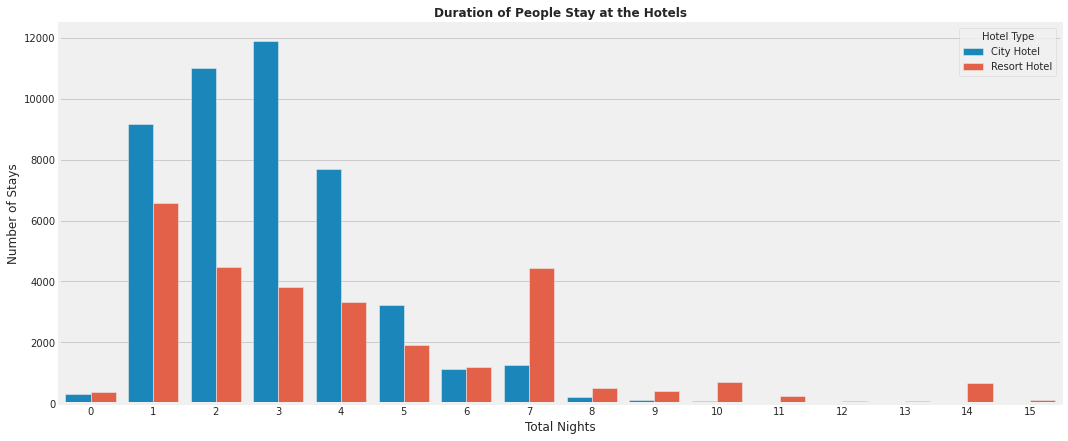

In [ ]:
#Now, Let's Visualize this Data -
plt.figure(figsize=(16, 7))
sns.barplot(x = 'total_nights',
           y = 'Number of Stays',
           hue = 'hotel',
           hue_order = ['City Hotel', 'Resort Hotel'],
           data = stay)
plt.title('Duration of People Stay at the Hotels', fontsize=12, fontweight='bold')
plt.xlabel('Total Nights')
plt.legend(title = 'Hotel Type', loc='upper right')
plt.show()

**Perception -**   
- ***Majority of People*** are prefer to Stay in the **"City Hotel"**, mostly for **'3'** Nights. It might because of the **"Prices"** of a **"City Hotel"** doesn't varied much when we compared it with **"Resort Hotel"**.

##<b>How many bookings were Cancelled?</b>

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df = df[df['is_canceled']==1]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [ ]:
#Checking for "Resort Hotel" -
len(df[df['hotel']=='Resort Hotel'])

11122

In [ ]:
#In a Similar Way, We can Check it for "City Hotel" -
len(df[df['hotel']=='City Hotel'])

33102

In [ ]:
#Now, Let's plot this data -
px.pie(values = [11122, 33102], names = ['Resort Hotel Cancellations', 'City Hotel Cancellations'], 
      title = 'Distribution w.r.t. Cancellation of Bookings')

**Perception -**
- From this ***Pie Chart***, will see, Almost **"75%"** of ***Cancel Bookings*** are with respect to our **"City Hotel**, whereas **"25%"** are with respect to our **"Resort Hotel Bookings"**.

##<b>Which Month have the Highest Number of Cancellations?</b>

In [ ]:
highest_Number_of_Cancellations = df['arrival_date_month'].value_counts().reset_index()
highest_Number_of_Cancellations

,index,arrival_date_month
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


In [ ]:
#Let's do some pre-processing -
highest_Number_of_Cancellations.rename(columns = {'index':'Month', 'arrival_date_month':'No. of Cancellations'}, inplace = True)
highest_Number_of_Cancellations

,Month,No. of Cancellations
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


In [ ]:
#Now, Let's sort this data -
highest_Number_of_Cancellations = sd.Sort_Dataframeby_Month(df=highest_Number_of_Cancellations, monthcolumnname = 'Month')
highest_Number_of_Cancellations

,Month,No. of Cancellations
0,January,1807
1,February,2696
2,March,3149
3,April,4524
4,May,4677
5,June,4535
6,July,4742
7,August,5239
8,September,4116
9,October,4246


In [ ]:
#Now, Let's visualize this data -
px.bar(data_frame = highest_Number_of_Cancellations, x = 'Month', y = 'No. of Cancellations', color = 'Month', 
      title = 'Month vs Number of Cancellations')

**Perception -**
- **"August"** Month has the ***Highest Number of Cancellations*** followed by **"July" & "May"**.

# **Conclusion**
* May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.
* the hotel business tends to make more profit during the rainy season. 
* The hotels can keep experimenting with their packages, interiors and amenities as there are more new guests than the repeated guests. 
* Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel. 
* Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
* The corporates mostly prefer Bed and Breakfast package, due to which the hotel can add more features to the package, also can profit from the customisation feature.
* Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies. 
* Encourage Direct bookings by offering special discounts.